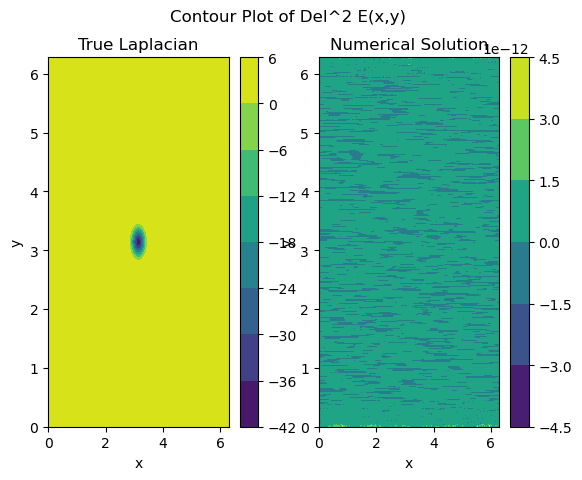

In [6]:
import numpy as np
import scipy.fftpack as sfft
import matplotlib.pyplot as plt
import sys

PI = np.pi

def spectralLaplacian(y, k1, k2, c2):
    """
    Function to calculate the Laplacian u = Del*((c^2(x1,x2))Del(y(x1,x2))) in the Fourier domain
    where Del is the two-dimensional gradient operator using Algorithm 7 from the paper "Notes on 
    FFT Based Differentiation" by Stephen Johnson of MIT from May 2011. c^2(x1,x2) represents 
    the square of the wave speed at location (x1,x2)

    Parameters:
        y: y(x1,x2)
        k1: Meshgrid of wave numbers for dimension 1
        k2: Meshgrid of wave numbers for dimension 2 
        c2: The function representing wave speed c^2(x1,x2)

    Return: 
        u: Spectral Laplacian u(x1,x2)
    """
    #Step 1
    Yk = sfft.fft2(y)
    Gk1 = np.multiply(1j*k1, Yk)
    Gk2 = np.multiply(1j*k2, Yk)
    gn1 = np.real(sfft.ifft(Gk1))
    gn2 = np.real(sfft.ifft(Gk2))
    #Step 2
    vn1 = np.multiply(c2, gn1)
    vn2 = np.multiply(c2, gn2)
    #Step 3
    Vk1 = sfft.fft2(vn1)
    Vk2 = sfft.fft2(vn2)
    Uk = np.multiply(1j*k1, Vk1) + np.multiply(1j*k2, Vk2)
    return np.real(sfft.ifft2(Uk))

def main():
    L = 2.0*PI
    N1 = N2 = 500 #Assume N1 = N2 in 2D FFT
    #k_neg = np.arange(-N1//2 + 1,0,1)
    #k_pos = np.concatenate((np.arange(N1//2), np.array([0])))*(N1/(2*PI))
    #kk1 = kk2 = np.concatenate((k_pos, k_neg))
    #k1, k2 = np.meshgrid(kk1, kk2, indexing='xy')

    kk = np.concatenate([np.arange(0, N1//2), [0], np.arange(-N1//2 + 1, 0)])
    kk2 = np.concatenate([np.arange(0, N2//2 + 1), np.arange(-N2//2 + 1, 0)])
    ik = ((2 * np.pi) / L) * 1j * kk
    ik2 = ((2 * np.pi) / L) * 1j * kk2
    ikX, ikY = np.meshgrid(ik, ik)
    ik2X, ik2Y = np.meshgrid(ik2, ik2)


    #True spectral derivative
    xc = np.linspace(0, 2*PI, num=N1)
    yc = np.linspace(0, 2*PI, num=N1)
    x, y = np.meshgrid(xc, yc, indexing='xy')
    Exy = np.exp(-10.0*(np.power(x - PI, 2) + np.power(y - PI, 2)))
    dEdx = np.multiply(-20.0*(x - PI), Exy)
    dEdy = np.multiply(-20.0*(y - PI), Exy)
    d2Edx2 = np.multiply(-20.0*(x - PI), dEdx) - 20.0*Exy
    d2Edy2 = np.multiply(-20.0*(y - PI), dEdy) - 20.0*Exy
    del2E = d2Edx2 + d2Edy2
    fig, ax = plt.subplots(1,2)
    cs1 = ax[0].contourf(x, y, del2E)
    cbar1 = fig.colorbar(cs1)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title("True Laplacian")
    
    #Numerical Spectral Derivative
    c2 = np.ones((N1,N2))
    del2Es = spectralLaplacian(Exy, ikX, ikY, c2)
    cs3 = ax[1].contourf(x, y, del2Es)
    cbar3 = fig.colorbar(cs3)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title("Numerical Solution")

    plt.suptitle('Contour Plot of Del^2 E(x,y)')
    plt.show()

if __name__ == "__main__":
    main()

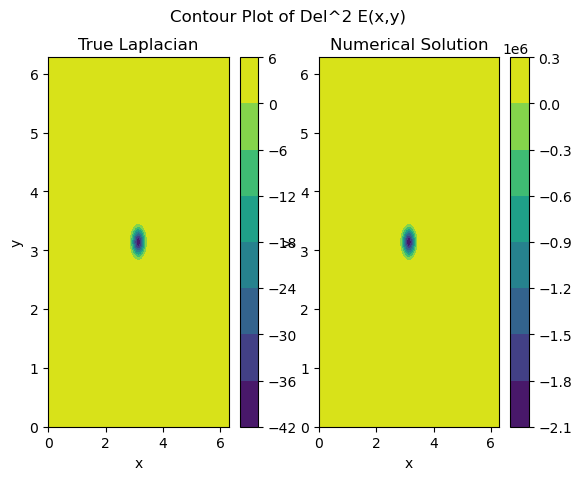

In [4]:
import numpy as np
import scipy.fftpack as sfft
import matplotlib.pyplot as plt
import sys

PI = np.pi

def spectralLaplacian(y, k1, k2, c2):
    """
    Function to calculate the Laplacian u = Del*((c^2(x1,x2))Del(y(x1,x2))) in the Fourier domain
    where Del is the two-dimensional gradient operator using Algorithm 7 from the paper "Notes on 
    FFT Based Differentiation" by Stephen Johnson of MIT from May 2011. c^2(x1,x2) represents 
    the square of the wave speed at location (x1,x2)

    Parameters:
        y: y(x1,x2)
        k1: Meshgrid of wave numbers for dimension 1
        k2: Meshgrid of wave numbers for dimension 2 
        c2: The function representing wave speed c^2(x1,x2)

    Return: 
        u: Spectral Laplacian u(x1,x2)
    """
    #Step 1
    Yk = sfft.fft2(y)
    Gk1 = np.multiply(1j*k1, Yk)
    Gk2 = np.multiply(1j*k2, Yk)
    gn1 = np.real(sfft.ifft(Gk1))
    gn2 = np.real(sfft.ifft(Gk2))
    #Step 2
    vn1 = np.multiply(c2, gn1)
    vn2 = np.multiply(c2, gn2)
    #Step 3
    #Vk1 = sfft.fft2(vn1)
    #Vk2 = sfft.fft2(vn2)
    #Uk = np.multiply(1j*k1, Vk1) + np.multiply(1j*k2, Vk2)
    Vk = sfft.fft2(np.multiply(c2, y))
    Uk = - (np.square(k1) + np.square(k2)) * Vk
    return np.real(sfft.ifft2(Uk))

def main():
    L = 2.0*PI
    N1 = N2 = 2000 #Assume N1 = N2 in 2D FFT
    k_neg = np.arange(-N1//2 + 1,0,1)
    k_pos = np.concatenate((np.arange(N1//2), np.array([0])))*(N1/(2*PI))
    kk1 = kk2 = np.concatenate((k_pos, k_neg))
    k1, k2 = np.meshgrid(kk1, kk2, indexing='xy')


    kk = np.concatenate([np.arange(0, N1//2), [0], np.arange(-N1//2 + 1, 0)])
    kk2 = np.concatenate([np.arange(0, N2//2 + 1), np.arange(-N2//2 + 1, 0)])
    ik = ((2 * np.pi) / L) * 1j * kk
    ik2 = ((2 * np.pi) / L) * 1j * kk2
    ikX, ikY = np.meshgrid(ik, ik)
    ik2X, ik2Y = np.meshgrid(ik2, ik2)

    fft_H_x = np.fft.ifft2(ikX * np.fft.fft2(H(X, Y)))
    fft_H_y = np.fft.ifft2(ikY * np.fft.fft2(H(X, Y)))


    #True spectral derivative
    xc = np.linspace(0, 2*PI, num=N1)
    yc = np.linspace(0, 2*PI, num=N1)
    x, y = np.meshgrid(xc, yc, indexing='xy')
    Exy = np.exp(-10.0*(np.power(x - PI, 2) + np.power(y - PI, 2)))
    dEdx = np.multiply(-20.0*(x - PI), Exy)
    dEdy = np.multiply(-20.0*(y - PI), Exy)
    d2Edx2 = np.multiply(-20.0*(x - PI), dEdx) - 20.0*Exy
    d2Edy2 = np.multiply(-20.0*(y - PI), dEdy) - 20.0*Exy
    del2E = d2Edx2 + d2Edy2
    fig, ax = plt.subplots(1,2)
    cs1 = ax[0].contourf(x, y, del2E)
    cbar1 = fig.colorbar(cs1)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title("True Laplacian")
    
    #Numerical Spectral Derivative
    c2 = np.ones((N1,N2))
    del2Es = spectralLaplacian(Exy, k1, k2, c2)
    cs3 = ax[1].contourf(x, y, del2Es)
    cbar3 = fig.colorbar(cs3)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title("Numerical Solution")

    plt.suptitle('Contour Plot of Del^2 E(x,y)')
    plt.show()

if __name__ == "__main__":
    main()

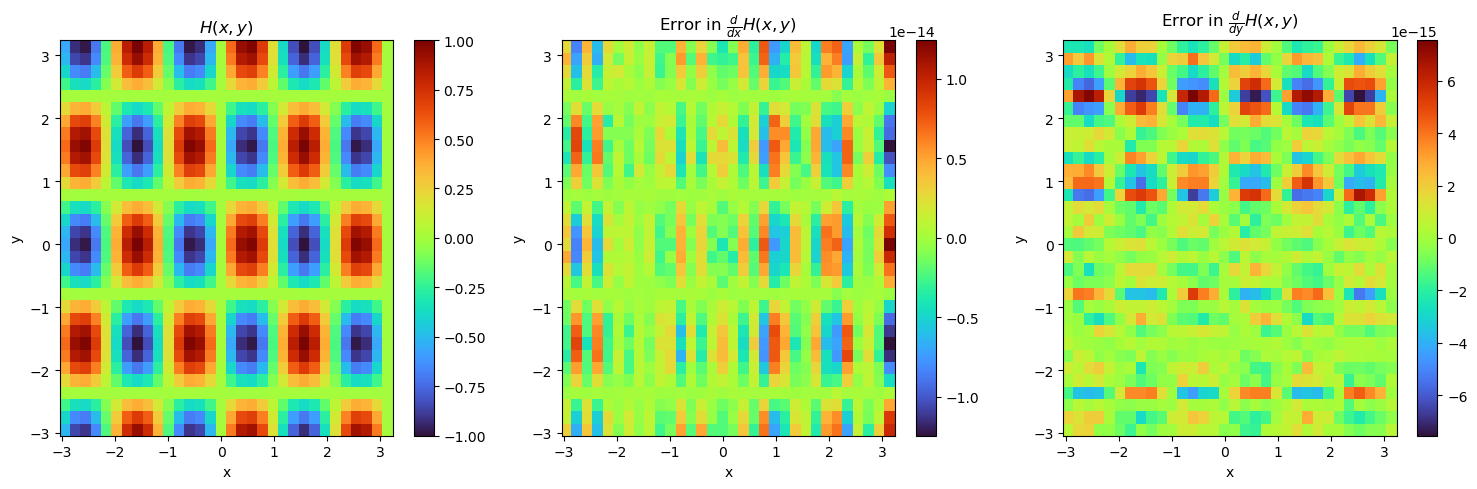

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 32
L = 2 * np.pi
h = L / N
x = h * np.arange(1, N+1) - L/2
X, Y = np.meshgrid(x, x)
sig = 100

def H(x, y):
    return np.sin(3 * x) * np.cos(2 * y)

def H_x(x, y):
    return 3 * np.cos(3 * x) * np.cos(2 * y)

def H_y(x, y):
    return -2 * np.sin(3 * x) * np.sin(2 * y)

kk = np.concatenate([np.arange(0, N//2), [0], np.arange(-N//2 + 1, 0)])
kk2 = np.concatenate([np.arange(0, N//2 + 1), np.arange(-N//2 + 1, 0)])
ik = ((2 * np.pi) / L) * 1j * kk
ik2 = ((2 * np.pi) / L) * 1j * kk2
ikX, ikY = np.meshgrid(ik, ik)
ik2X, ik2Y = np.meshgrid(ik2, ik2)

fft_H_x = np.fft.ifft2(ikX * np.fft.fft2(H(X, Y)))
fft_H_y = np.fft.ifft2(ikY * np.fft.fft2(H(X, Y)))

# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pcolor(X, Y, H(X, Y), cmap="turbo")
plt.title(r'$H(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.pcolor(X, Y, np.real(H_x(X, Y) - fft_H_x), cmap="turbo")
plt.title(r'Error in $\frac{d}{dx} H(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.pcolor(X, Y, np.real(H_y(X, Y) - fft_H_y), cmap="turbo")
plt.title(r'Error in $\frac{d}{dy} H(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.tight_layout()
plt.show()
